<a href="https://colab.research.google.com/github/ejigboa/ejigboa.github.io/blob/main/House_Price_Prediction_Using_Ames_Housing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [36]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.impute import SimpleImputer



In [37]:
pd.options.display.float_format = '{:.4f}'.format # scientific notation
pd.set_option('display.max_columns', None) # see cols

In [38]:
# To check my working directory
os.getcwd()



'/content'

In [39]:
if not os.path.exists('plots'):
    os.makedirs('plots')

In [40]:
#load both training and testing datasets
#load both training and testing datasets
tr = pd.read_csv('train.csv')
ts = pd.read_csv('test.csv')

In [7]:
tr.shape

(2051, 81)

In [8]:
ts.shape

(878, 80)

In [9]:
ts.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0000,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,NaN,0.0000,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0000,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,NaN,0.0000,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0000,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0000,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,0.0000,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0000,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0000,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0000,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0000,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0000,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0000,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [41]:
#change column name to lower case
tr.columns = tr.columns.str.lower()
ts.columns = ts.columns.str.lower()

In [42]:
#remove spaces between column names
tr.columns = [i.replace(' ', '_') for i in tr.columns]
ts.columns = [i.replace(' ', '_') for i in ts.columns]


tr.columns = [i.replace('/', '_') for i in tr.columns]
ts.columns = [i.replace('/', '_') for i in ts.columns]

In [43]:
#check for the first 2 rows in the testing dataset
ts.head(2)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0000,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,NaN,0.0000,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0000,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,NaN,0.0000,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0000,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD


In [44]:
#Show a quick overview of the data
tr.describe()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod_add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
count,2051.0000,2051.0000,2051.0000,1721.0000,2051.0000,2051.0000,2051.0000,2051.0000,2051.0000,2029.0000,2050.0000,2050.0000,2050.0000,2050.0000,2051.0000,2051.0000,2051.0000,2051.0000,2049.0000,2049.0000,2051.0000,2051.0000,2051.0000,2051.0000,2051.0000,2051.0000,1937.0000,2050.0000,2050.0000,2051.0000,2051.0000,2051.0000,2051.0000,2051.0000,2051.0000,2051.0000,2051.0000,2051.0000,2051.0000
mean,1474.0336,713590006.0917,57.0088,69.0552,10065.2082,6.1121,5.5622,1971.7089,1984.1902,99.6959,442.3005,47.9590,567.7283,1057.9878,1164.4881,329.3291,5.5129,1499.3301,0.4275,0.0634,1.5773,0.3710,2.8435,1.0429,6.4359,0.5909,1978.7078,1.7766,473.6717,93.8337,47.5568,22.5719,2.5914,16.5115,2.3979,51.5744,6.2199,2007.7757,181469.7016
std,843.9808,188691837.8853,42.8242,23.2607,6742.4889,1.4263,1.1045,30.1779,21.0363,174.9631,461.2041,165.0009,444.9548,449.4107,396.4469,425.6710,51.0689,500.4478,0.5227,0.2517,0.5493,0.5010,0.8266,0.2098,1.5602,0.6385,25.4411,0.7645,215.9346,128.5494,66.7472,59.8451,25.2296,57.3742,37.7826,573.3940,2.7447,1.3120,79258.6594
min,1.0000,526301100.0000,20.0000,21.0000,1300.0000,1.0000,1.0000,1872.0000,1950.0000,0.0000,0.0000,0.0000,0.0000,0.0000,334.0000,0.0000,0.0000,334.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,1895.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,2006.0000,12789.0000
25%,753.5000,528458140.0000,20.0000,58.0000,7500.0000,5.0000,5.0000,1953.5000,1964.5000,0.0000,0.0000,0.0000,220.0000,793.0000,879.5000,0.0000,0.0000,1129.0000,0.0000,0.0000,1.0000,0.0000,2.0000,1.0000,5.0000,0.0000,1961.0000,1.0000,319.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.0000,2007.0000,129825.0000
50%,1486.0000,535453200.0000,50.0000,68.0000,9430.0000,6.0000,5.0000,1974.0000,1993.0000,0.0000,368.0000,0.0000,474.5000,994.5000,1093.0000,0.0000,0.0000,1444.0000,0.0000,0.0000,2.0000,0.0000,3.0000,1.0000,6.0000,1.0000,1980.0000,2.0000,480.0000,0.0000,27.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.0000,2008.0000,162500.0000
75%,2198.0000,907180080.0000,70.0000,80.0000,11513.5000,7.0000,6.0000,2001.0000,2004.0000,161.0000,733.7500,0.0000,811.0000,1318.7500,1405.0000,692.5000,0.0000,1728.5000,1.0000,0.0000,2.0000,1.0000,3.0000,1.0000,7.0000,1.0000,2002.0000,2.0000,576.0000,168.0000,70.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8.0000,2009.0000,214000.0000
max,2930.0000,924152030.0000,190.0000,313.0000,159000.0000,10.0000,9.0000,2010.0000,2010.0000,1600.0000,5644.0000,1474.0000,2336.0000,6110.0000,5095.0000,1862.0000,1064.0000,5642.0000,3.0000,2.0000,4.0000,2.0000,8.0000,3.0000,15.0000,4.0000,2207.0000,5.0000,1418.0000,1424.0000,547.0000,432.0000,508.0000,490.0000,800.0000,17000.0000,12.0000,2010.0000,611657.0000


# Datasets Overview
The [housing dataset](https://www.kaggle.com/competitions/dsb-521-ames-housing-challenge/data) used in this project is sourced from Kaggle and consists of two files: train.csv and test.csv.

### train.csv
- Number of Variables: 81
- Number of Observations: 2051
Description: This file contains detailed information about various features of houses in Ames, IA, along with their respective sale prices. Each row represents a unique house, and the columns represent different attributes such as lot size, building type, year built, and more, including the target variable SalePrice.

### test.csv
- Number of Variables: 80
- Number of Observations: 878
Description: This file includes the same features as the training set, except for the SalePrice column, which needs to be predicted. Each row represents a unique house, and the columns provide information on various attributes similar to those in the training set.
Example of Features in the Dataset
Both datasets include a wide range of features, such as:

Basic Information: Id, PID
Zoning and Lot: MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street
Property Attributes: Lot Shape, Land Contour, Utilities, Lot Config
Neighborhood and Condition: Neighborhood, Condition 1, Condition 2
Building Characteristics: Bldg Type, House Style, Overall Qual, Overall Cond
Construction Details: Year Built, Year Remod/Add, Roof Style, Roof Matl
Exterior Features: Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area
Basement Features: Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1
Living Area: 1st Flr SF, 2nd Flr SF, Gr Liv Area
Bathrooms and Bedrooms: Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr
Garage: Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area

| #  | Column           | Non-Null Count | Dtype   | Description                                           |
|----|------------------|----------------|---------|-------------------------------------------------------|
| 0  | id               | 2051           | int64   | Unique identifier for each property                   |
| 1  | pid              | 2051           | int64   | Parcel identification number                          |
| 2  | ms_subclass      | 2051           | int64   | The type of dwelling involved                         |
| 3  | ms_zoning        | 2051           | object  | The general zoning classification                      |
| 4  | lot_frontage     | 1721           | float64 | Linear feet of street connected to property            |
| 5  | lot_area         | 2051           | int64   | Lot size in square feet                                |
| 6  | street           | 2051           | object  | Type of road access                                    |
| 7  | alley            | 140            | object  | Type of alley access                                   |
| 8  | lot_shape        | 2051           | object  | General shape of property                              |
| 9  | land_contour     | 2051           | object  | Flatness of the property                               |
| 10 | utilities        | 2051           | object  | Type of utilities available                            |
| 11 | lot_config       | 2051           | object  | Lot configuration                                     |
| 12 | land_slope       | 2051           | object  | Slope of property                                     |
| 13 | neighborhood     | 2051           | object  | Physical locations within Ames city limits            |
| 14 | condition_1      | 2051           | object  | Proximity to various conditions                        |
| 15 | condition_2      | 2051           | object  | Proximity to various conditions (if a second is present) |
| 16 | bldg_type        | 2051           | object  | Type of dwelling                                      |
| 17 | house_style      | 2051           | object  | Style of dwelling                                     |
| 18 | overall_qual     | 2051           | int64   | Overall material and finish quality                   |
| 19 | overall_cond     | 2051           | int64   | Overall condition rating                              |
| 20 | year_built       | 2051           | int64   | Original construction date                            |
| 21 | year_remod_add   | 2051           | int64   | Remodel date (same as construction date if no remodeling) |
| 22 | roof_style       | 2051           | object  | Type of roof                                          |
| 23 | roof_matl        | 2051           | object  | Roof material                                         |
| 24 | exterior_1st     | 2051           | object  | Exterior covering on house                            |
| 25 | exterior_2nd     | 2051           | object  | Exterior covering on house (if more than one material) |
| 26 | mas_vnr_type     | 811            | object  | Masonry veneer type                                   |
| 27 | mas_vnr_area     | 2029           | float64 | Masonry veneer area in square feet                    |
| 28 | exter_qual       | 2051           | object  | Exterior material quality                             |
| 29 | exter_cond       | 2051           | object  | Present condition of the material on the exterior     |
| 30 | foundation       | 2051           | object  | Type of foundation                                    |
| 31 | bsmt_qual        | 1996           | object  | Height of the basement                                |
| 32 | bsmt_cond        | 1996           | object  | General condition of the basement                     |
| 33 | bsmt_exposure    | 1993           | object  | Walkout or garden level basement walls                |
| 34 | bsmtfin_type_1   | 1996           | object  | Quality of basement finished area                     |
| 35 | bsmtfin_sf_1     | 2050           | float64 | Type 1 finished square feet                           |
| 36 | bsmtfin_type_2   | 1995           | object  | Quality of second finished area (if present)          |
| 37 | bsmtfin_sf_2     | 2050           | float64 | Type 2 finished square feet                           |
| 38 | bsmt_unf_sf      | 2050           | float64 | Unfinished square feet of basement area               |
| 39 | total_bsmt_sf    | 2050           | float64 | Total square feet of basement area                    |
| 40 | heating          | 2051           | object  | Type of heating                                       |
| 41 | heating_qc       | 2051           | object  | Heating quality and condition                         |
| 42 | central_air      | 2051           | object  | Central air conditioning                              |
| 43 | electrical       | 2051           | object  | Electrical system                                     |
| 44 | 1st_flr_sf       | 2051           | int64   | First floor square feet                               |
| 45 | 2nd_flr_sf       | 2051           | int64   | Second floor square feet                              |
| 46 | low_qual_fin_sf  | 2051           | int64   | Low quality finished square feet (all floors)         |
| 47 | gr_liv_area      | 2051           | int64   | Above grade (ground) living area square feet          |
| 48 | bsmt_full_bath   | 2049           | float64 | Basement full bathrooms                               |
| 49 | bsmt_half_bath   | 2049           | float64 | Basement half bathrooms                               |
| 50 | full_bath        | 2051           | int64   | Full bathrooms above grade                            |
| 51 | half_bath        | 2051           | int64   | Half baths above grade                                |
| 52 | bedroom_abvgr    | 2051           | int64   | Bedrooms above grade                                  |
| 53 | kitchen_abvgr    | 2051           | int64   | Kitchens above grade                                  |
| 54 | kitchen_qual     | 2051           | object  | Kitchen quality                                       |
| 55 | totrms_abvgrd    | 2051           | int64   | Total rooms above grade (excluding bathrooms)         |
| 56 | functional       | 2051           | object  | Home functionality rating                             |
| 57 | fireplaces       | 2051           | int64   | Number of fireplaces                                  |
| 58 | fireplace_qu     | 1051           | object  | Fireplace quality                                     |
| 59 | garage_type      | 1938           | object  | Garage location                                       |
| 60 | garage_yr_blt    | 1937           | float64 | Year garage was built                                 |
| 61 | garage_finish    | 1937           | object  | Interior finish of the garage                         |
| 62 | garage_cars      | 2050           | float64 | Size of garage in car capacity                        |
| 63 | garage_area      | 2050           | float64 | Size of garage in square feet                         |
| 64 | garage_qual      | 1937           | object  | Garage quality                                        |
| 65 | garage_cond      | 1937           | object  | Garage condition                                      |
| 66 | paved_drive      | 2051           | object  | Paved driveway                                        |
| 67 | wood_deck_sf     | 2051           | int64   | Wood deck area in square feet                         |
| 68 | open_porch_sf    | 2051           | int64   | Open porch area in square feet                        |
| 69 | enclosed_porch   | 2051           | int64   | Enclosed porch area in square feet                    |
| 70 | 3ssn_porch       | 2051           | int64   | Three season porch area in square feet                |
| 71 | screen_porch     | 2051           | int64   | Screen porch area in square feet                      |
| 72 | pool_area        | 2051           | int64   | Pool area in square feet                              |
| 73 | pool_qc          | 9              | object  | Pool quality                                          |
| 74 | fence            | 400            | object  | Fence quality                                         |
| 75 | misc_feature     | 65             | object  | Miscellaneous feature not covered in other categories |
| 76 | misc_val         | 2051           | int64   | $ Value of miscellaneous feature                      |
| 77 | mo_sold          | 2051           | int64   | Month sold                                            |
| 78 | yr_sold          | 2051           | int64   | Year sold                                             |
| 79 | sale_type        | 2051           | object  | Type of sale                                          |
| 80 | saleprice        | 2051           | int64   | Sale price                                            |



In [45]:
#check for incorrect datatype
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [46]:
#This is to show a quick overview of the data
tr.describe()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod_add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
count,2051.0000,2051.0000,2051.0000,1721.0000,2051.0000,2051.0000,2051.0000,2051.0000,2051.0000,2029.0000,2050.0000,2050.0000,2050.0000,2050.0000,2051.0000,2051.0000,2051.0000,2051.0000,2049.0000,2049.0000,2051.0000,2051.0000,2051.0000,2051.0000,2051.0000,2051.0000,1937.0000,2050.0000,2050.0000,2051.0000,2051.0000,2051.0000,2051.0000,2051.0000,2051.0000,2051.0000,2051.0000,2051.0000,2051.0000
mean,1474.0336,713590006.0917,57.0088,69.0552,10065.2082,6.1121,5.5622,1971.7089,1984.1902,99.6959,442.3005,47.9590,567.7283,1057.9878,1164.4881,329.3291,5.5129,1499.3301,0.4275,0.0634,1.5773,0.3710,2.8435,1.0429,6.4359,0.5909,1978.7078,1.7766,473.6717,93.8337,47.5568,22.5719,2.5914,16.5115,2.3979,51.5744,6.2199,2007.7757,181469.7016
std,843.9808,188691837.8853,42.8242,23.2607,6742.4889,1.4263,1.1045,30.1779,21.0363,174.9631,461.2041,165.0009,444.9548,449.4107,396.4469,425.6710,51.0689,500.4478,0.5227,0.2517,0.5493,0.5010,0.8266,0.2098,1.5602,0.6385,25.4411,0.7645,215.9346,128.5494,66.7472,59.8451,25.2296,57.3742,37.7826,573.3940,2.7447,1.3120,79258.6594
min,1.0000,526301100.0000,20.0000,21.0000,1300.0000,1.0000,1.0000,1872.0000,1950.0000,0.0000,0.0000,0.0000,0.0000,0.0000,334.0000,0.0000,0.0000,334.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,1895.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,2006.0000,12789.0000
25%,753.5000,528458140.0000,20.0000,58.0000,7500.0000,5.0000,5.0000,1953.5000,1964.5000,0.0000,0.0000,0.0000,220.0000,793.0000,879.5000,0.0000,0.0000,1129.0000,0.0000,0.0000,1.0000,0.0000,2.0000,1.0000,5.0000,0.0000,1961.0000,1.0000,319.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.0000,2007.0000,129825.0000
50%,1486.0000,535453200.0000,50.0000,68.0000,9430.0000,6.0000,5.0000,1974.0000,1993.0000,0.0000,368.0000,0.0000,474.5000,994.5000,1093.0000,0.0000,0.0000,1444.0000,0.0000,0.0000,2.0000,0.0000,3.0000,1.0000,6.0000,1.0000,1980.0000,2.0000,480.0000,0.0000,27.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.0000,2008.0000,162500.0000
75%,2198.0000,907180080.0000,70.0000,80.0000,11513.5000,7.0000,6.0000,2001.0000,2004.0000,161.0000,733.7500,0.0000,811.0000,1318.7500,1405.0000,692.5000,0.0000,1728.5000,1.0000,0.0000,2.0000,1.0000,3.0000,1.0000,7.0000,1.0000,2002.0000,2.0000,576.0000,168.0000,70.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8.0000,2009.0000,214000.0000
max,2930.0000,924152030.0000,190.0000,313.0000,159000.0000,10.0000,9.0000,2010.0000,2010.0000,1600.0000,5644.0000,1474.0000,2336.0000,6110.0000,5095.0000,1862.0000,1064.0000,5642.0000,3.0000,2.0000,4.0000,2.0000,8.0000,3.0000,15.0000,4.0000,2207.0000,5.0000,1418.0000,1424.0000,547.0000,432.0000,508.0000,490.0000,800.0000,17000.0000,12.0000,2010.0000,611657.0000


In [47]:
mv = tr.isna().sum()
mv[mv>0].sort_values(ascending = False)

pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
mas_vnr_type      1240
fireplace_qu      1000
lot_frontage       330
garage_yr_blt      114
garage_cond        114
garage_qual        114
garage_finish      114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmt_qual           55
bsmtfin_type_1      55
bsmt_cond           55
mas_vnr_area        22
bsmt_half_bath       2
bsmt_full_bath       2
bsmtfin_sf_1         1
garage_cars          1
garage_area          1
total_bsmt_sf        1
bsmt_unf_sf          1
bsmtfin_sf_2         1
dtype: int64

In [48]:
tr['fireplace_qu'].unique()

array([nan, 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

In [49]:
tr.shape

(2051, 81)

In [50]:
#To define the scale
ordinal_mapping = {
    np.nan: 0,
    'TA': 1,
    'Fa': 2,
    'Gd': 3,
    'Po': 4,
    'Ex': 5,
}

# map the scale to the fireplace column
tr['fireplace_qu']=tr['fireplace_qu'].map(ordinal_mapping)
ts['fireplace_qu']=ts['fireplace_qu'].map(ordinal_mapping)

In [51]:

# map the scale to the Exterior material quality column
tr['exter_qual']=tr['exter_qual'].map(ordinal_mapping)
ts['exter_qual']=ts['exter_qual'].map(ordinal_mapping)

In [52]:
# map the scale to the Exterior material quality column
tr['exter_qual']=tr['exter_qual'].map(ordinal_mapping)
ts['exter_qual']=ts['exter_qual'].map(ordinal_mapping)

# map the scale to the Present condition of the material on the exterior
tr['exter_cond']=tr['exter_cond'].map(ordinal_mapping)
ts['exter_cond']=ts['exter_cond'].map(ordinal_mapping)

tr['bsmt_qual']=tr['bsmt_qual'].map(ordinal_mapping)
ts['bsmt_qual']=ts['bsmt_qual'].map(ordinal_mapping)

tr['bsmt_cond']=tr['bsmt_cond'].map(ordinal_mapping)
ts['bsmt_cond']=ts['bsmt_cond'].map(ordinal_mapping)

tr['kitchen_qual']=tr['kitchen_qual'].map(ordinal_mapping)
ts['kitchen_qual']=ts['kitchen_qual'].map(ordinal_mapping)


tr['heating_qc']=tr['heating_qc'].map(ordinal_mapping)
ts['heating_qc']=ts['heating_qc'].map(ordinal_mapping)


tr['garage_qual']=tr['garage_qual'].map(ordinal_mapping)
ts['garage_qual']=ts['garage_qual'].map(ordinal_mapping)

tr['garage_cond']=tr['garage_cond'].map(ordinal_mapping)
ts['garage_cond']=ts['garage_cond'].map(ordinal_mapping)

tr['pool_qc']=tr['pool_qc'].map(ordinal_mapping)
ts['pool_qc']=ts['pool_qc'].map(ordinal_mapping)

In [53]:
#To define the scale
ordinal_mapping_2 = {
    np.nan: 0,
    'no': 0,
    'No': 0,
    'NO': 0,
    'n': 0,
    'N': 0,
    'yes': 1,
    'Yes': 1,
    'YES': 1,
    'y': 1,
    'Y': 1 }

# map the scale to the central air
tr['central_air']=tr['central_air'].map(ordinal_mapping)
ts['central_air']=ts['central_air'].map(ordinal_mapping)

tr['paved_drive']=tr['paved_drive'].map(ordinal_mapping)
ts['paved_drive']=ts['paved_drive'].map(ordinal_mapping)

In [54]:
tr.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0000,NaN,1,CBlock,1,1,No,GLQ,533.0000,Unf,0.0000,192.0000,725.0000,GasA,5,NaN,SBrkr,725,754,0,1479,0.0000,0.0000,2,1,3,1,3,6,Typ,0,0,Attchd,1976.0000,RFn,2.0000,475.0000,1,1,NaN,0,44,0,0,0,0,0,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0000,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0000,NaN,1,PConc,3,1,No,GLQ,637.0000,Unf,0.0000,276.0000,913.0000,GasA,5,NaN,SBrkr,913,1209,0,2122,1.0000,0.0000,2,1,4,1,3,8,Typ,1,1,Attchd,1997.0000,RFn,2.0000,559.0000,1,1,NaN,0,74,0,0,0,0,0,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0000,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,NaN,0.0000,NaN,3,CBlock,1,1,No,GLQ,731.0000,Unf,0.0000,326.0000,1057.0000,GasA,1,NaN,SBrkr,1057,0,0,1057,1.0000,0.0000,1,0,3,1,3,5,Typ,0,0,Detchd,1953.0000,Unf,1.0000,246.0000,1,1,NaN,0,52,0,0,0,0,0,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0000,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,0.0000,NaN,1,PConc,3,1,No,Unf,0.0000,Unf,0.0000,384.0000,384.0000,GasA,3,NaN,SBrkr,744,700,0,1444,0.0000,0.0000,2,1,3,1,1,7,Typ,0,0,BuiltIn,2007.0000,Fin,2.0000,400.0000,1,1,NaN,100,0,0,0,0,0,0,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0000,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,NaN,0.0000,NaN,1,PConc,2,3,No,Unf,0.0000,Unf,0.0000,676.0000,676.0000,GasA,1,NaN,SBrkr,831,614,0,1445,0.0000,0.0000,2,0,3,1,1,6,Typ,0,0,Detchd,1957.0000,Unf,2.0000,484.0000,1,1,NaN,0,59,0,0,0,0,0,NaN,NaN,0,3,2010,WD,138500


In [55]:
#rename and first and secodn floor column
tr.rename(columns = {'1st_flr_sf':'ft_flr_sf','2nd_flr_sf':'sd_flr_sf'}, inplace = True)
ts.rename(columns = {'1st_flr_sf':'ft_flr_sf','2nd_flr_sf':'sd_flr_sf'}, inplace = True)


#rename the 3ssn_porch column
tr.rename(columns = {'3ssn_porch':'td_ssn_porch'}, inplace = True)
ts.rename(columns = {'3ssn_porch':'td_ssn_porch'}, inplace = True)


In [56]:
# Identify string columns with NaN values
str_tr_col = [colm for colm in tr.select_dtypes(include='object') if tr[colm].isnull().any()]
str_ts_col = [colm for colm in tr.select_dtypes(include='object') if tr[colm].isnull().any()]


In [57]:
tr.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,ft_flr_sf,sd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0000,NaN,1,CBlock,1,1,No,GLQ,533.0000,Unf,0.0000,192.0000,725.0000,GasA,5,NaN,SBrkr,725,754,0,1479,0.0000,0.0000,2,1,3,1,3,6,Typ,0,0,Attchd,1976.0000,RFn,2.0000,475.0000,1,1,NaN,0,44,0,0,0,0,0,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0000,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0000,NaN,1,PConc,3,1,No,GLQ,637.0000,Unf,0.0000,276.0000,913.0000,GasA,5,NaN,SBrkr,913,1209,0,2122,1.0000,0.0000,2,1,4,1,3,8,Typ,1,1,Attchd,1997.0000,RFn,2.0000,559.0000,1,1,NaN,0,74,0,0,0,0,0,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0000,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,NaN,0.0000,NaN,3,CBlock,1,1,No,GLQ,731.0000,Unf,0.0000,326.0000,1057.0000,GasA,1,NaN,SBrkr,1057,0,0,1057,1.0000,0.0000,1,0,3,1,3,5,Typ,0,0,Detchd,1953.0000,Unf,1.0000,246.0000,1,1,NaN,0,52,0,0,0,0,0,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0000,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,0.0000,NaN,1,PConc,3,1,No,Unf,0.0000,Unf,0.0000,384.0000,384.0000,GasA,3,NaN,SBrkr,744,700,0,1444,0.0000,0.0000,2,1,3,1,1,7,Typ,0,0,BuiltIn,2007.0000,Fin,2.0000,400.0000,1,1,NaN,100,0,0,0,0,0,0,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0000,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,NaN,0.0000,NaN,1,PConc,2,3,No,Unf,0.0000,Unf,0.0000,676.0000,676.0000,GasA,1,NaN,SBrkr,831,614,0,1445,0.0000,0.0000,2,0,3,1,1,6,Typ,0,0,Detchd,1957.0000,Unf,2.0000,484.0000,1,1,NaN,0,59,0,0,0,0,0,NaN,NaN,0,3,2010,WD,138500


In [58]:
#drop duplicated rows
tr = tr.drop_duplicates()
tr.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,ft_flr_sf,sd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0000,NaN,1,CBlock,1,1,No,GLQ,533.0000,Unf,0.0000,192.0000,725.0000,GasA,5,NaN,SBrkr,725,754,0,1479,0.0000,0.0000,2,1,3,1,3,6,Typ,0,0,Attchd,1976.0000,RFn,2.0000,475.0000,1,1,NaN,0,44,0,0,0,0,0,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0000,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0000,NaN,1,PConc,3,1,No,GLQ,637.0000,Unf,0.0000,276.0000,913.0000,GasA,5,NaN,SBrkr,913,1209,0,2122,1.0000,0.0000,2,1,4,1,3,8,Typ,1,1,Attchd,1997.0000,RFn,2.0000,559.0000,1,1,NaN,0,74,0,0,0,0,0,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0000,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,NaN,0.0000,NaN,3,CBlock,1,1,No,GLQ,731.0000,Unf,0.0000,326.0000,1057.0000,GasA,1,NaN,SBrkr,1057,0,0,1057,1.0000,0.0000,1,0,3,1,3,5,Typ,0,0,Detchd,1953.0000,Unf,1.0000,246.0000,1,1,NaN,0,52,0,0,0,0,0,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0000,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,0.0000,NaN,1,PConc,3,1,No,Unf,0.0000,Unf,0.0000,384.0000,384.0000,GasA,3,NaN,SBrkr,744,700,0,1444,0.0000,0.0000,2,1,3,1,1,7,Typ,0,0,BuiltIn,2007.0000,Fin,2.0000,400.0000,1,1,NaN,100,0,0,0,0,0,0,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0000,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,NaN,0.0000,NaN,1,PConc,2,3,No,Unf,0.0000,Unf,0.0000,676.0000,676.0000,GasA,1,NaN,SBrkr,831,614,0,1445,0.0000,0.0000,2,0,3,1,1,6,Typ,0,0,Detchd,1957.0000,Unf,2.0000,484.0000,1,1,NaN,0,59,0,0,0,0,0,NaN,NaN,0,3,2010,WD,138500


In [59]:
# Identify numerical and categorical columns
numerical_cols = tr.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = tr.select_dtypes(include=['object']).columns

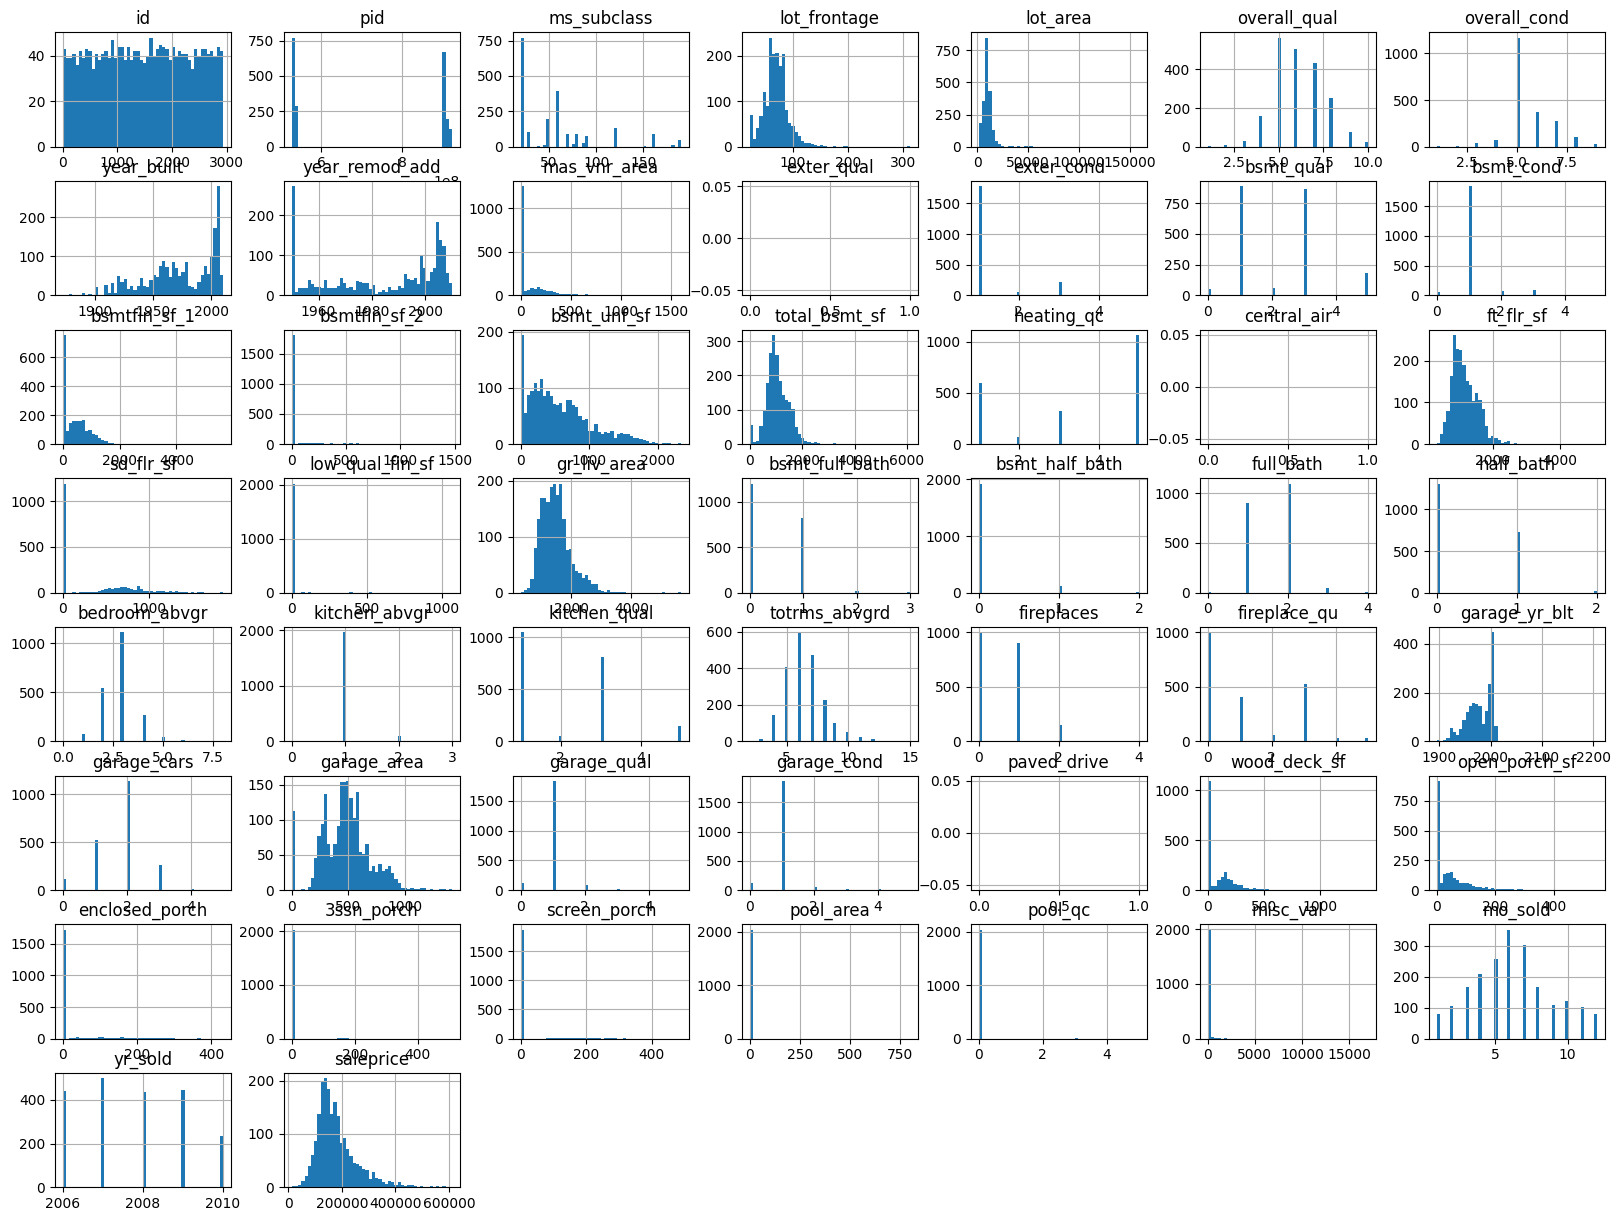

In [60]:
# Histograms for numerical features
tr[numerical_cols].hist(bins=50, figsize=(20, 15))
plt.savefig('plots/numerical_histograms.jpeg')

<ipython-input-61-2af77f02f82a>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


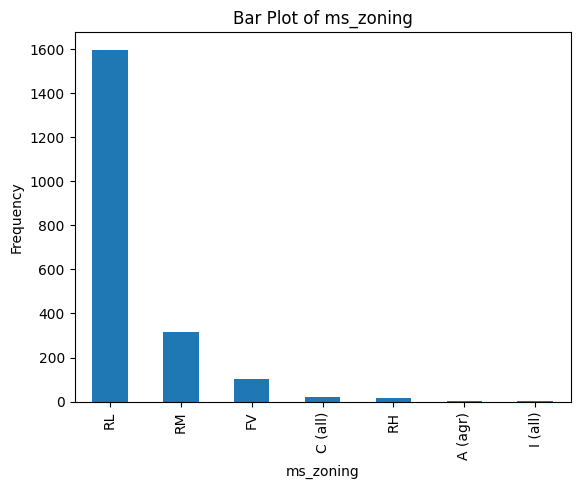

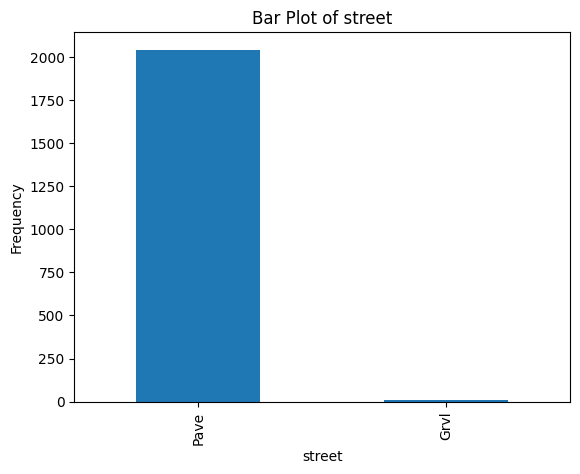

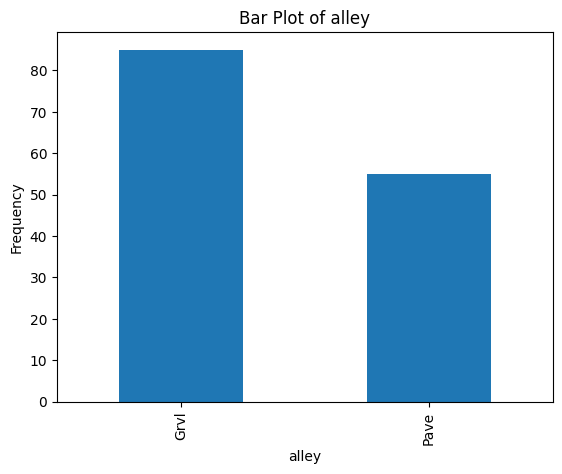

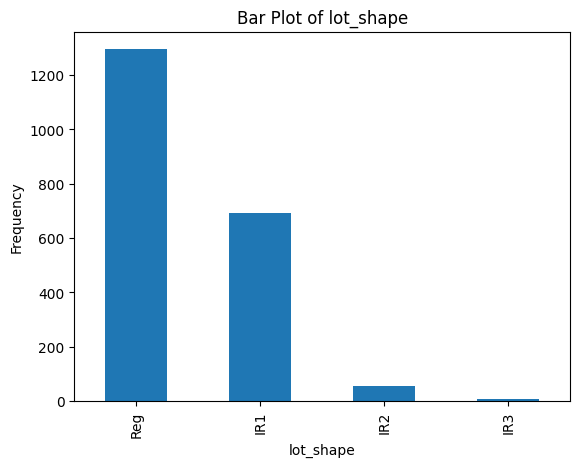

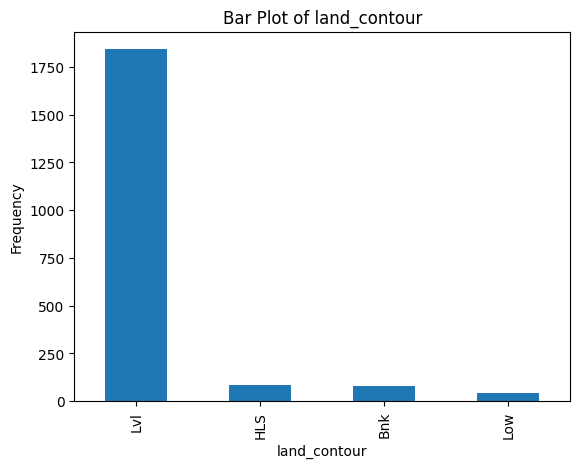

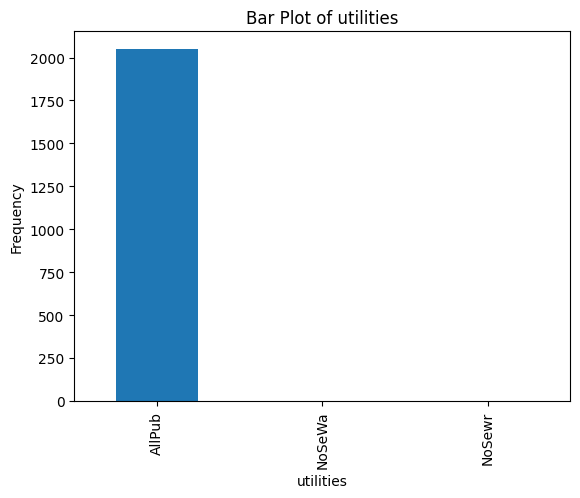

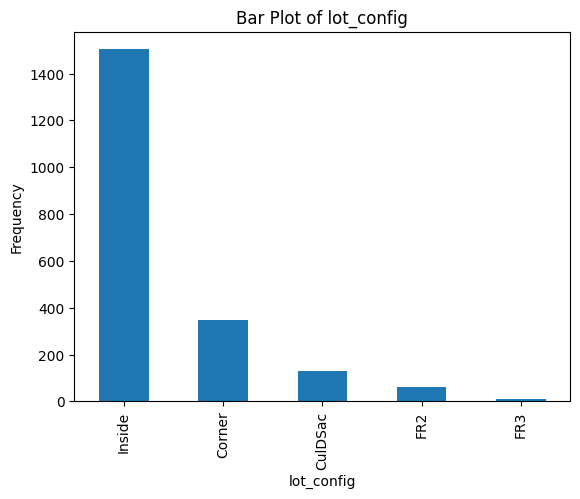

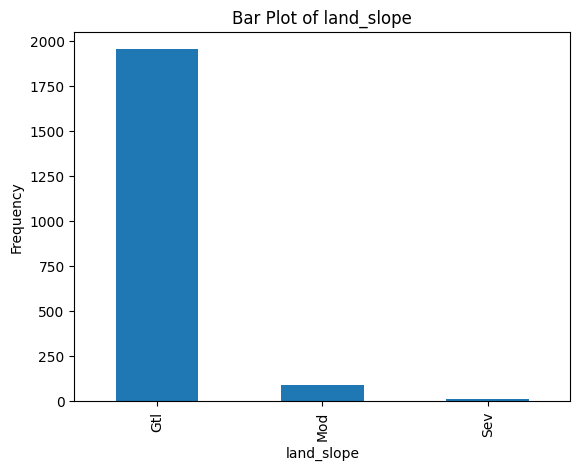

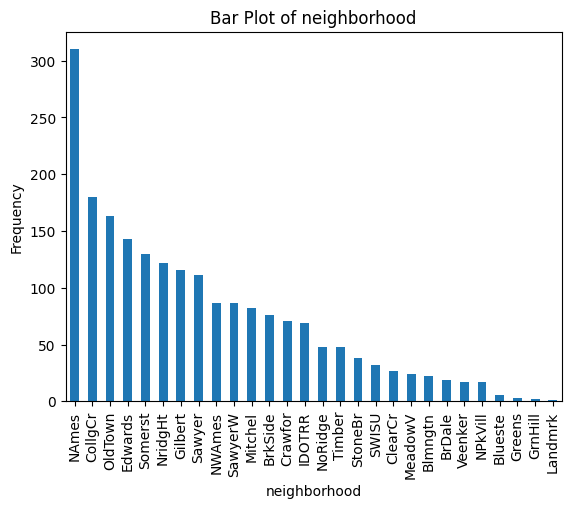

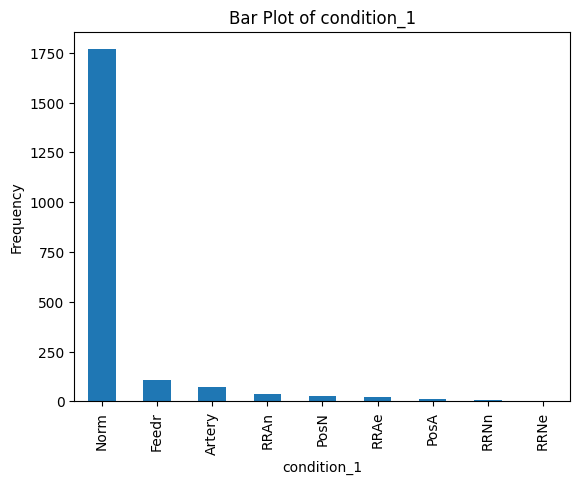

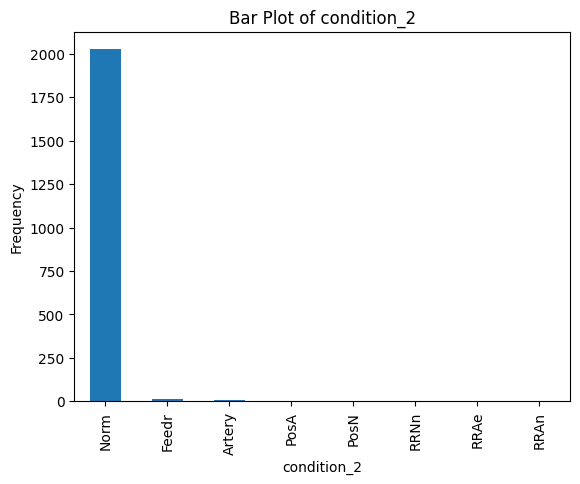

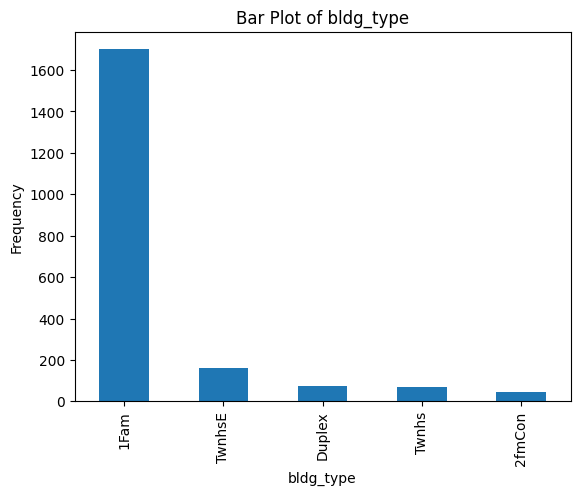

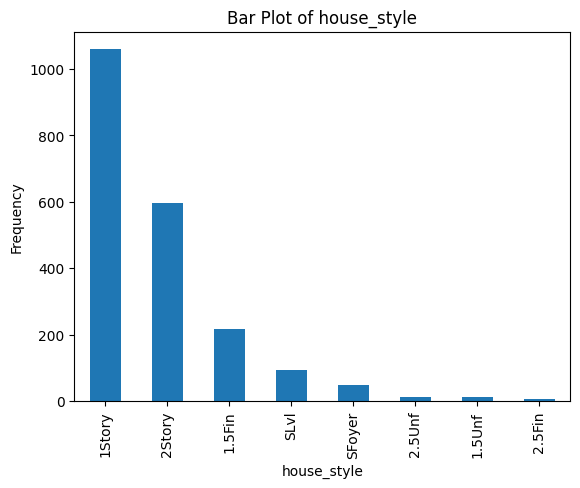

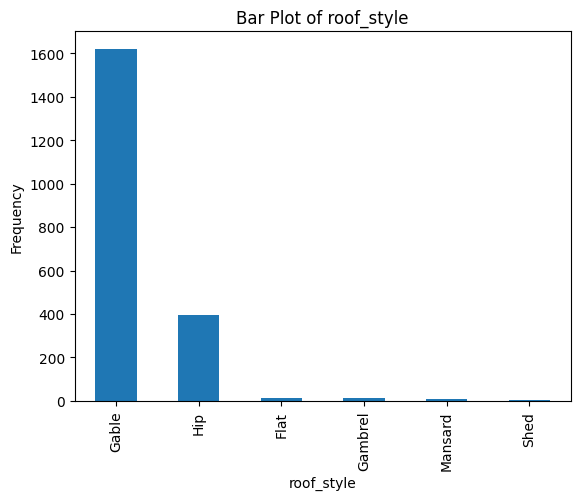

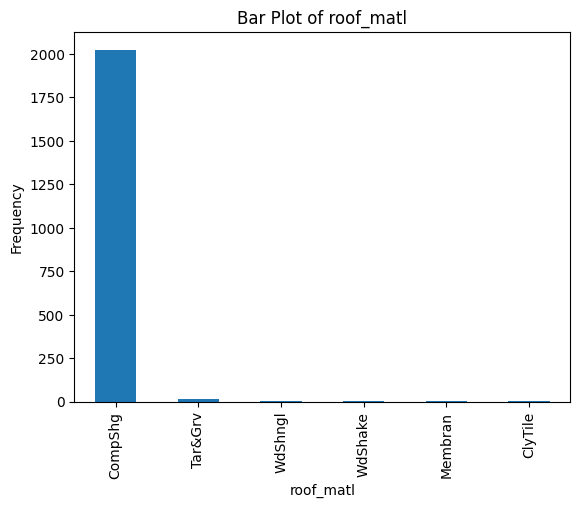

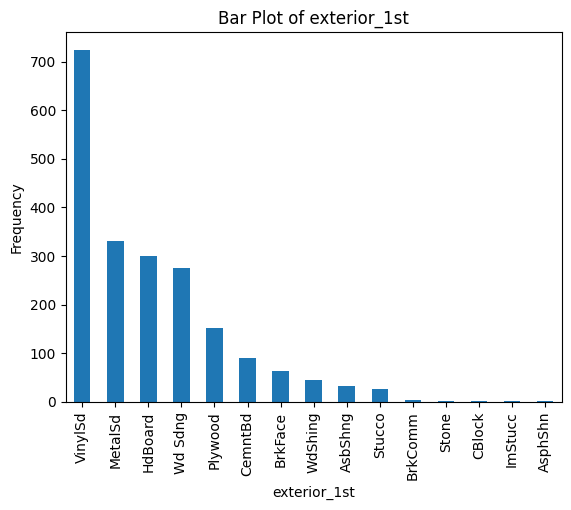

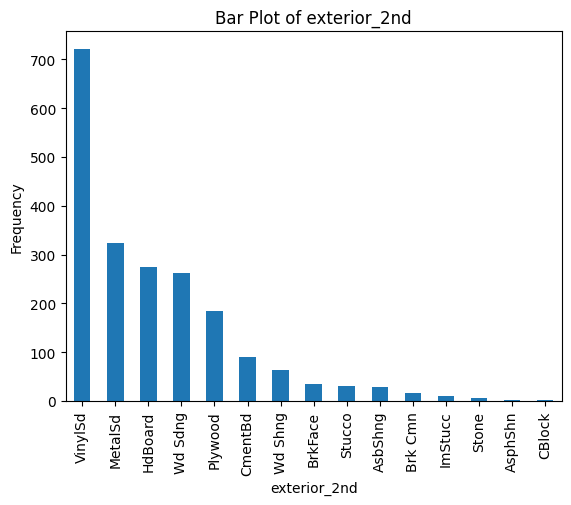

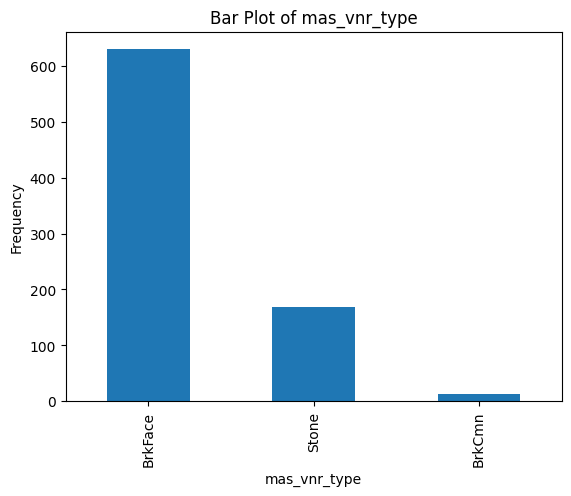

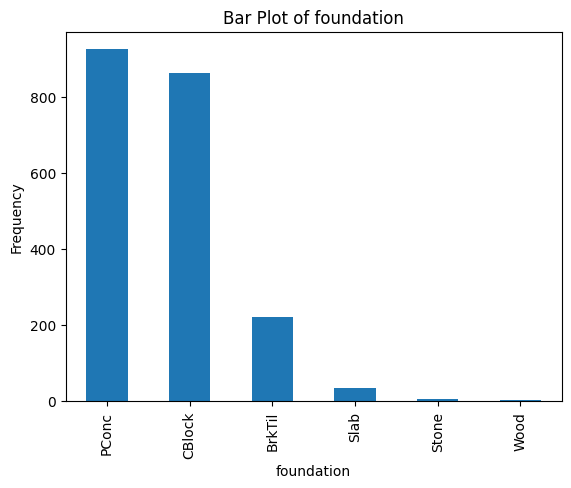

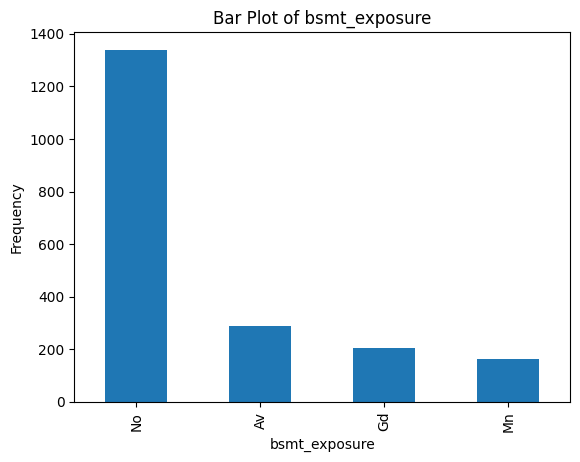

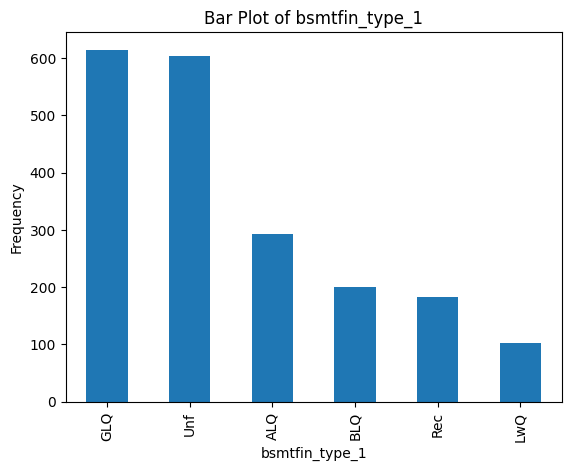

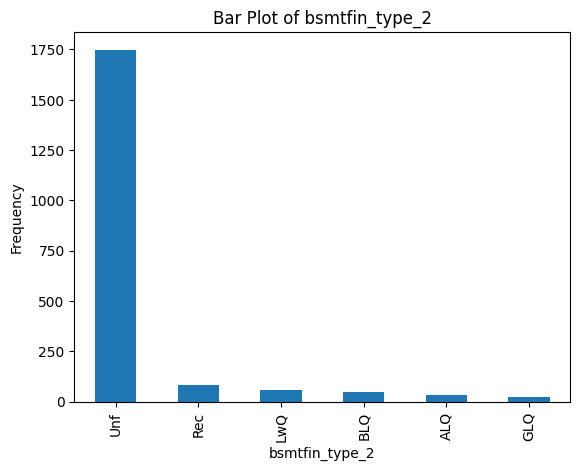

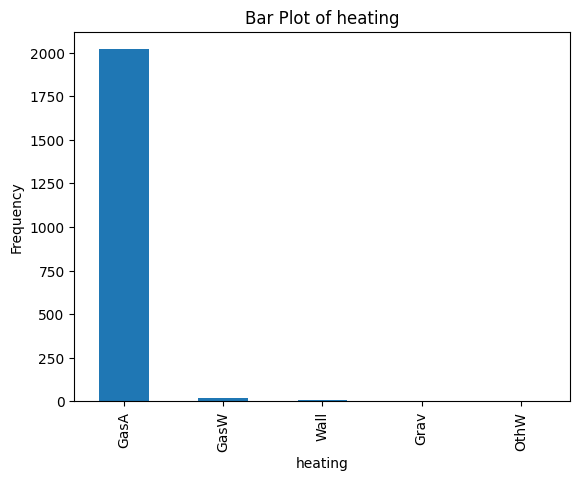

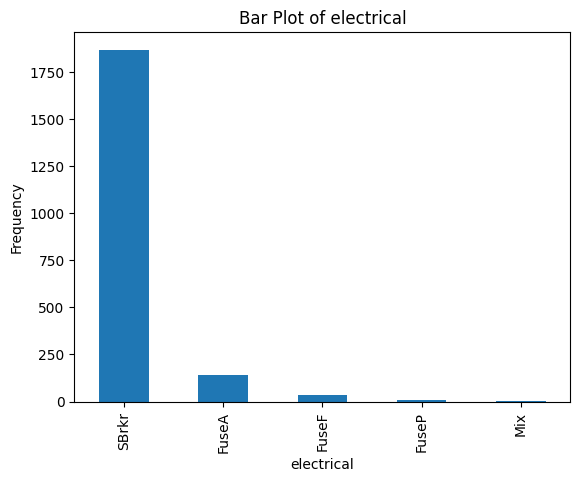

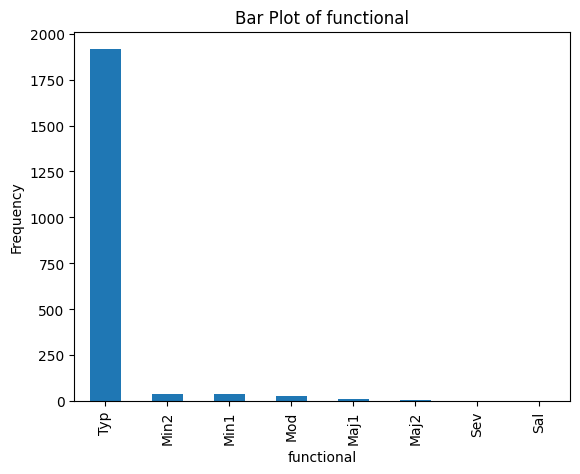

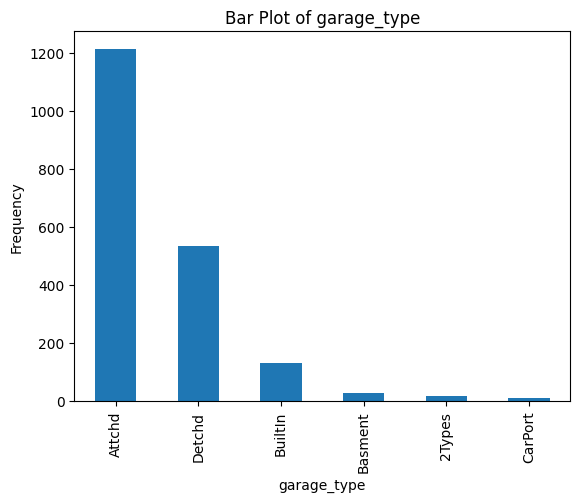

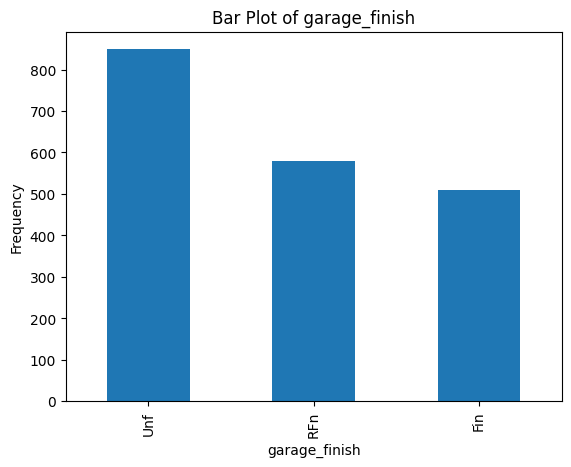

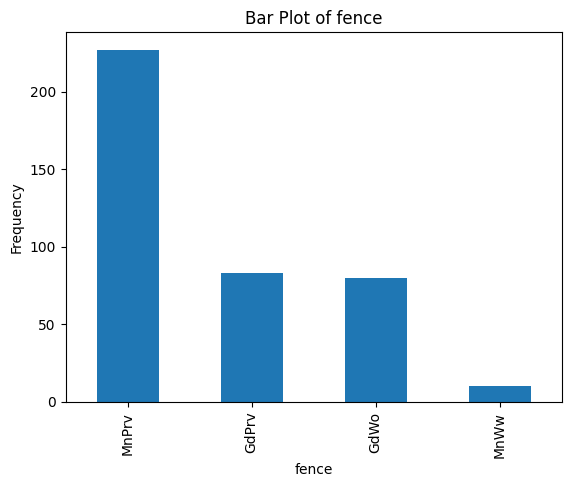

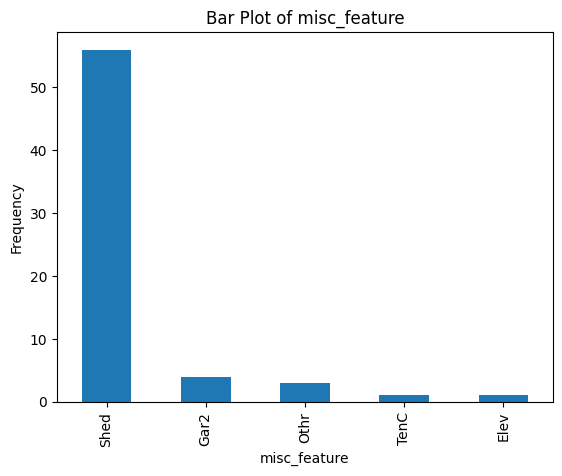

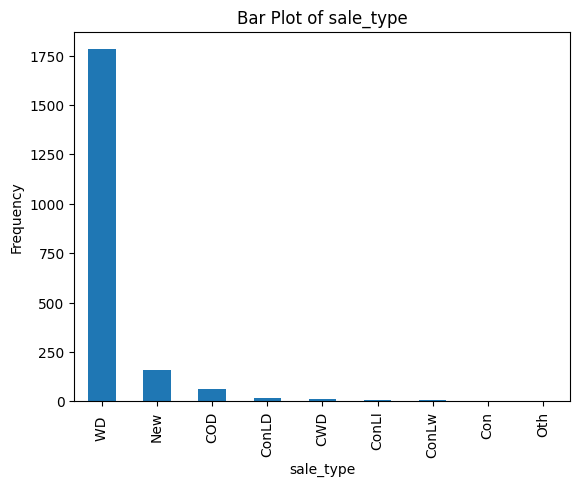

In [61]:
# Bar plots for categorical features
for col in categorical_cols:
    plt.figure()
    tr[col].value_counts().plot(kind='bar')
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.savefig('plots/categorical_histograms.jpeg')

In [ ]:
tr.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod_add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', 'ft_flr_sf',
       'sd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'gar

In [ ]:
Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod_add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', 'ft_flr_sf',
       'sd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'garage_finish', 'garage_cars', 'garage_area', 'garage_qual',
       'garage_cond', 'paved_drive', 'wood_deck_sf', 'open_porch_sf',
       'enclosed_porch', 'td_ssn_porch', 'screen_porch', 'pool_area',
       'pool_qc', 'fence', 'misc_feature', 'misc_val', 'mo_sold', 'yr_sold',
       'sale_type', 'saleprice'],
      dtype='object')

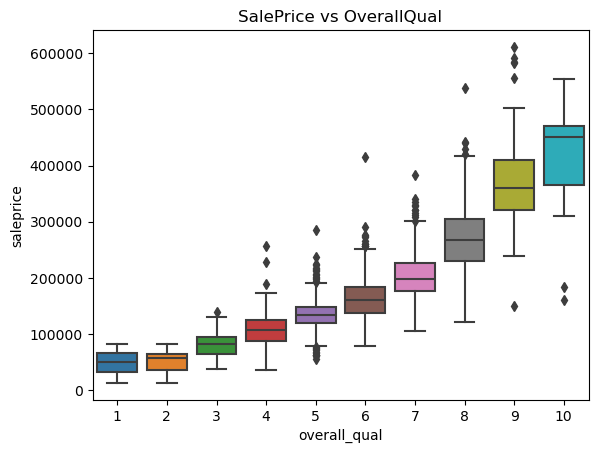

In [ ]:
sns.boxplot(x='overall_qual', y='saleprice', data=tr)
plt.title('SalePrice vs OverallQual')
plt.savefig('plots/SalePrice vs OverallQual Boxplot.jpeg')

<Axes: >

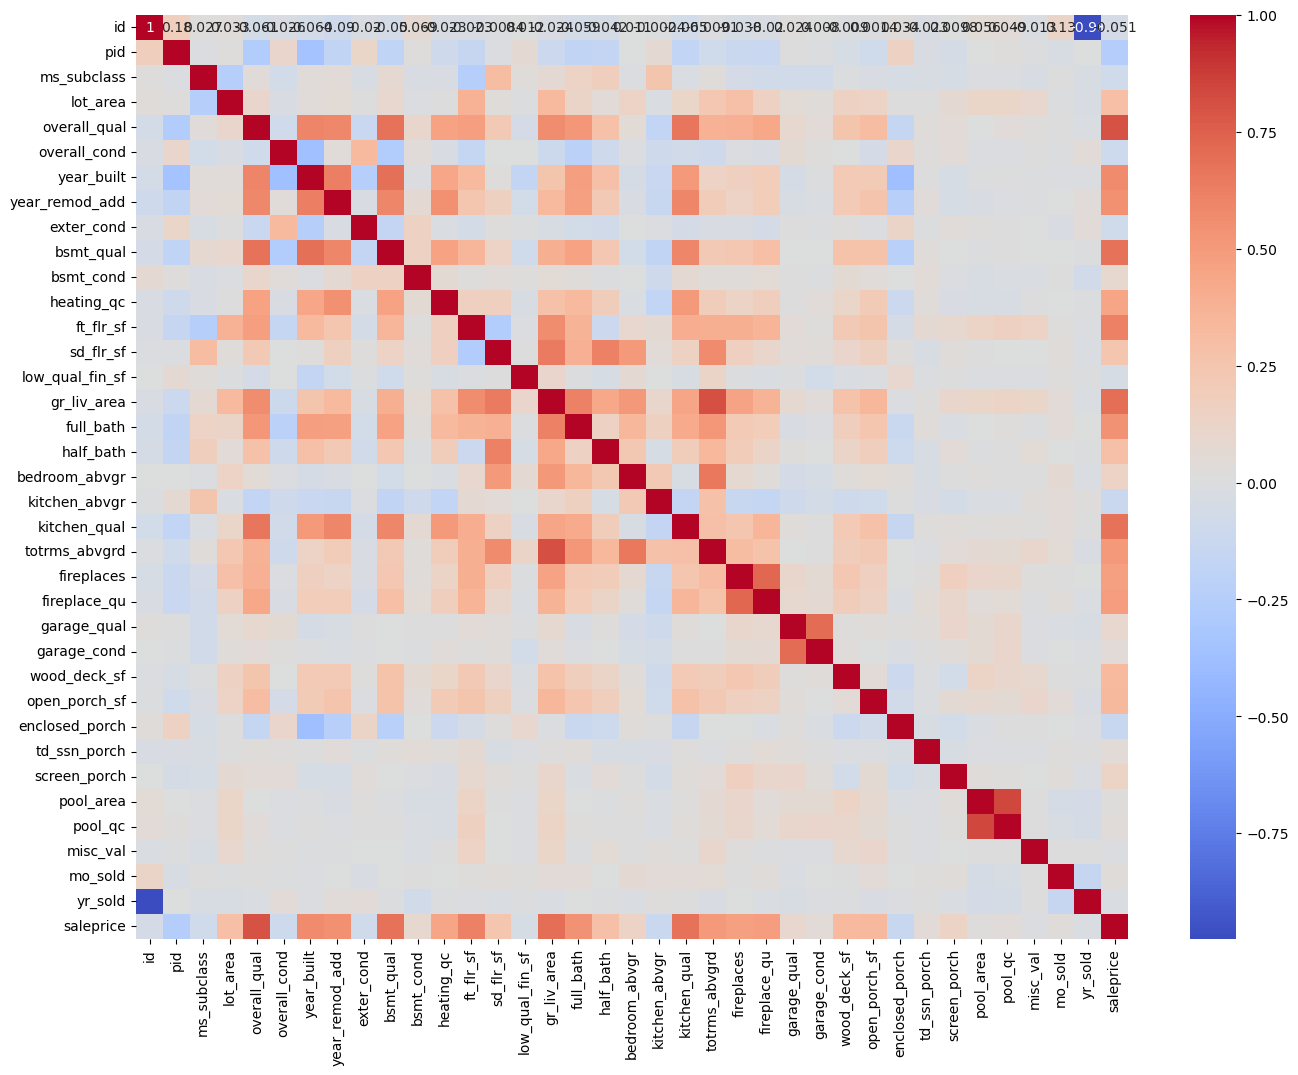

In [ ]:
#check for columns with integers and plot the heatmap
numerical_cols = tr.select_dtypes(include=['int', 'int64', 'int32']).columns
plt.figure(figsize = (16,12))
corr_matrix = tr[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [62]:
#Shuffling my best variables
col = [
        #'id'
       #, 'pid'
       #,
        #'ms_subclass'
       #,
    'lot_area'
       , 'overall_qual'
       #, 'overall_cond'
       ,'year_built'
       , 'year_remod_add'
       #, 'exter_qual'
       , 'bsmt_cond'
       #, 'bsmt_cond'
       , 'heating_qc'
       #,'central_air'
       , 'ft_flr_sf'
       , 'sd_flr_sf'
       #, 'low_qual_fin_sf'
       ,'gr_liv_area'
       , 'full_bath'
       , 'half_bath'
       , 'bedroom_abvgr'
       #,'kitchen_abvgr'
       , 'kitchen_qual'
       , 'totrms_abvgrd'
       , 'fireplaces'
       #,'garage_qual'
       #, 'garage_cond'
       , 'wood_deck_sf'
       , 'open_porch_sf'
       #,'enclosed_porch'
       #, 'td_ssn_porch'
       , 'screen_porch'
       , 'pool_area'
       ,'pool_qc'
       #, 'misc_val'
       #, 'mo_sold'
       , 'yr_sold'
      #'saleprice'
      ]

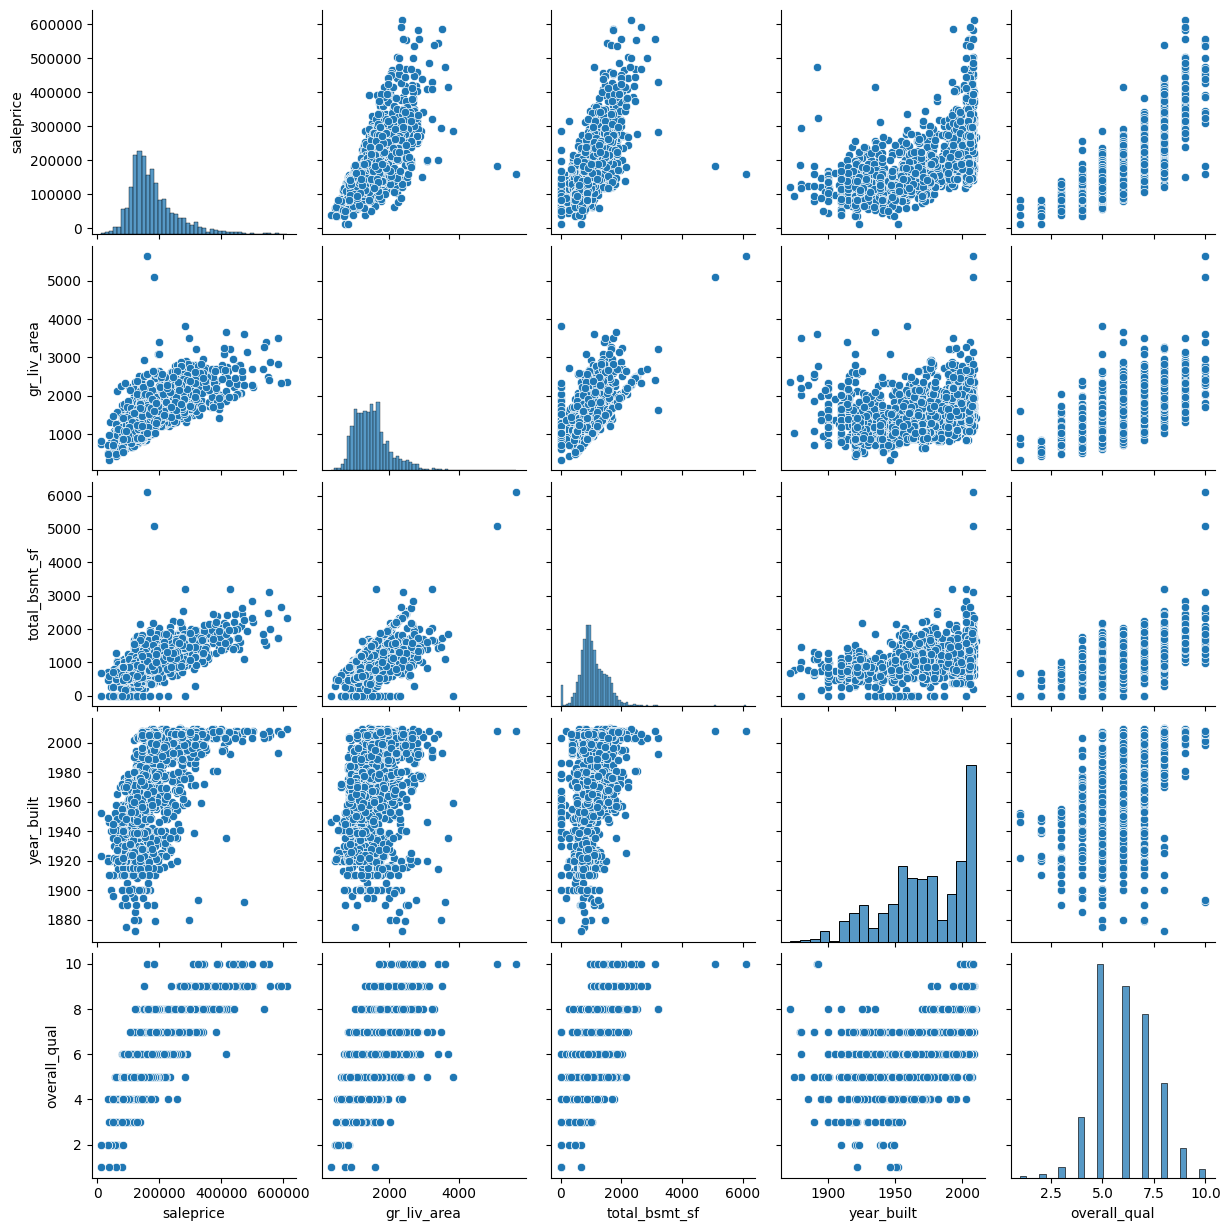

In [63]:
# Pair plots
sns.pairplot(tr[['saleprice', 'gr_liv_area', 'total_bsmt_sf', 'year_built', 'overall_qual']])
plt.show()

# Build a baseline model

In [64]:
#Assign data to X and y
X = tr[col]
y  = tr['saleprice']
X_test = ts[col]

#Split my train.csv data into training and testing data
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state = 2024)

In [65]:
baseline_predictions = [y_train.mean()]*len(y_val)
bp = baseline_predictions.copy()

pd.Series(bp).head()

0   180779.0657
1   180779.0657
2   180779.0657
3   180779.0657
4   180779.0657
dtype: float64

In [66]:
#baseline MAE
bp_mae = mean_absolute_error(y_val, bp)
bp_mae



60143.5905380776

In [67]:
#baseline MSE
bp_mse = mean_squared_error(y_val, bp)
bp_mse

6687232614.760764

In [68]:
#The root mean square error
bp_rmse = mean_squared_error(y_val, bp, squared = False)
bp_rmse

81775.50131158331

In [69]:
#R^2 for baseline model
bp_rsc = r2_score(y_val, bp)
bp_rsc

-0.001141415949648339

# Now, let's build a LinearRegression model for our predictions.


In [70]:
#Assign data to X and y
X = tr[col]
y  = tr['saleprice']
X_test = ts[col]

In [71]:
#Split my train.csv data into training and testing data
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state = 2024)

In [72]:
X_train.shape

(1538, 21)

In [73]:
X_val.shape

(513, 21)

In [74]:
y_train.shape

(1538,)

# Preprosessing

In [75]:
#Simple Inputer
si = SimpleImputer(strategy='mean')
X_train_si = si.fit_transform(X_train)
X_val_si = si.transform(X_val)

# Applying standardScaling
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train_si)
X_val_sc = sc.transform(X_val_si)

# Instantiate and fit Linear Regression model
lr = LinearRegression()
lr.fit(X_train_sc, y_train)

LinearRegression()

In [76]:
lr.score(X_train_sc, y_train)

0.8231409161684369

In [ ]:
lr.score(X_val_sc, y_val)

0.7839809860503237

### The r^2 score for the train data is 82.31% and the r^2 for the validation data is 78.4%. This shows that the model is good enough.

In [ ]:
y_val_pred = lr.predict(X_val_sc)
y_val_pred

array([180443.64234077, 101693.31386484, 213203.23065031,  68419.06306531,
       200092.88234458, 109077.91132677, 107732.09557245, 255764.0841533 ,
       187525.38509984, 180906.57427562, 238963.8876009 , 373875.93092381,
        71085.25720525, 111722.24342599, 108495.95308744, 126762.53781675,
        88011.54554932,  73381.76019551,  96694.39045591, 115278.71864051,
        97911.536777  , 196591.09528104, 282685.44633893, 173142.12744256,
       300171.71716664, 221471.6075337 , 136158.9797362 , 217210.41124374,
       222960.83216902, 250939.55701174, 291495.00126087, 248515.15358594,
       117765.13153602, 144527.59313386, 380587.98424371,  79863.27490281,
       206369.39271611, 150283.59863229, 163730.47264343, 235505.22874553,
       161372.57237432, 183222.59780354, 146299.18009463, 138721.70046119,
       157130.64767339, 136296.31502903, 199650.73210651, 290254.63633684,
       148880.3710122 , 175996.97808127, 165119.36521491, 220131.5259752 ,
       186983.2050848 , 2

In [ ]:
residuals = y_val - y_val_pred
residuals

1921    48056.3577
1596     6786.6861
1825   -27718.2307
1125    19080.9369
1144   -31092.8823
           ...    
1071    19262.7604
1980   -26181.4163
793    -29884.5756
484    -14653.8531
485      1916.1636
Name: saleprice, Length: 513, dtype: float64

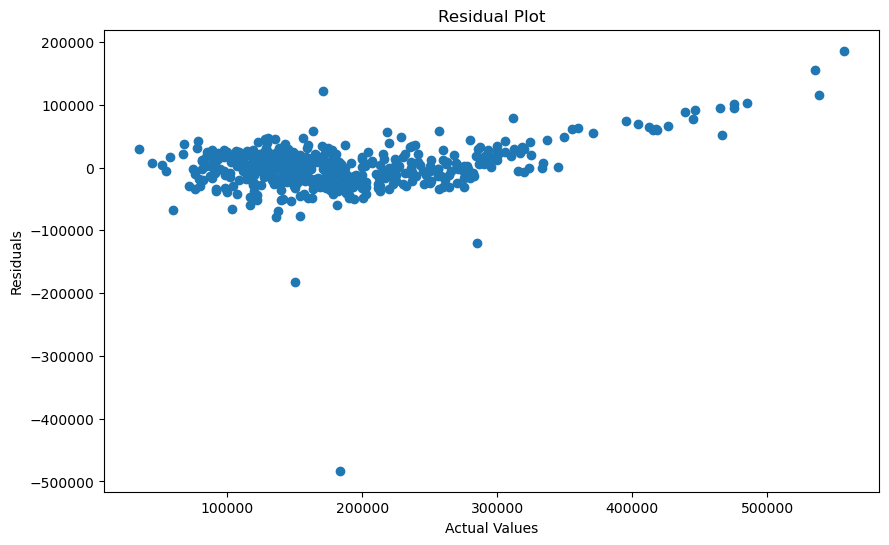

In [ ]:
# Plotting the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_val, residuals)
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.savefig('plots/residual')



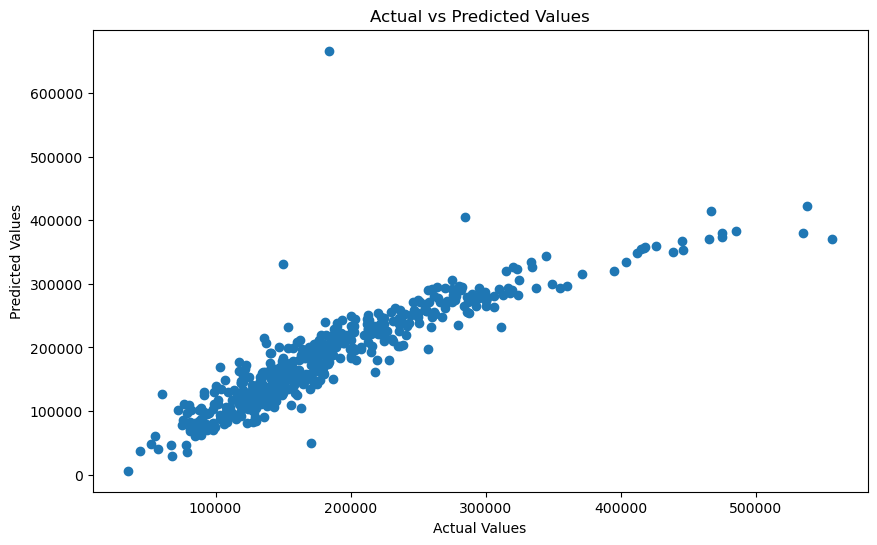

In [ ]:
# Plotting the predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, label='Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.savefig('plots/Actual vs Predicted Values')


In [ ]:
#To find the avaluation metrics
lr_mae = mean_absolute_error(y_val, y_val_pred)
lr_mse = mean_squared_error(y_val, y_val_pred)
lr_rmse = np.sqrt(lr_mse)
lr_rsc = r2_score(y_val, y_val_pred)

print ('mean absolut:', lr_mae)
print ('mean squ:',lr_mse)
print ('root mean sq:',lr_rmse)
print ('r score:',lr_rsc)

mean absolut: 23155.529861224775
mean squ: 1442922420.8274982
root mean sq: 37985.81868049573
r score: 0.7839809860503237


Text(0.5, 1.0, 'Comparison of Baseline Model and Linear Regression Model')

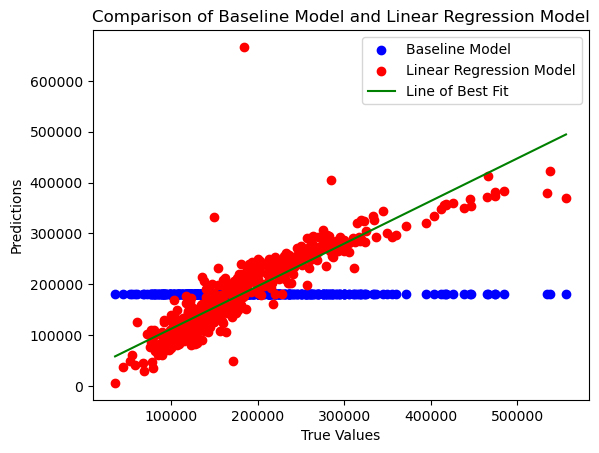

In [ ]:
# Plotting the baseline predictions
plt.scatter(y_val, bp, color='blue', label='Baseline Model')

# Plotting the linear regression model predictions
plt.scatter(y_val, y_val_pred, color='red', label='Linear Regression Model')
plt.plot(np.unique(y_val), np.poly1d(np.polyfit(y_val, y_val_pred, 1))(np.unique(y_val)), color='green', label='Line of Best Fit')


# Adding labels and legend
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.savefig('plots/Comparison of Baseline Model and Linear Regression Model')

# Adding a title
plt.title('Comparison of Baseline Model and Linear Regression Model')


In [ ]:
# Generate predictions on the test set
test_predictions = lr.predict(X_test)

# Optionally, save the predictions to a CSV file
output = pd.DataFrame({'Id':ts.id, 'saleprice': test_predictions})
output.to_csv('test_predictions.csv', index=False)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
